<br>
<br>
<div align="center" style ='font-size: 24px'>CM3015 Machine Learning and Neural Networks</div>
<br>
<br>
<div align="center" style ='font-size: 24px'>Deep Learning On A Public Dataset</div>
<br>
<br>

<p style ='font-size: 18px'>CONTENTS:</p>

<ol style="font-size: 18px;">
  <li>Importing libraries</li>
  <li>Read CSV file:
    <ul>
      <li>Data Shape</li>
      <li>Null Values</li>
      <li>Check Data Partitions:
        <ul>
          <li>Train</li>
          <li>Test</li>
          <li>Valid</li>
        </ul>
      </li>
      <li>Counts for each Data Partition</li>
      <li>Proportions for each Data Partition</li>
      <li>Classes contained in the Dataset</li>
      <li>Is the dataset Balanced?</li>
      <li>How many instances do we have available for training per each class?</li>
      <li>Checking and Analyzing CSV File Paths</li>
      <li>Dealing with broken file paths:
        <ul>
          <li>Correcting the conflict between path names in the csv file and some image file paths in the image folder</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Visualizing some random images from image directories:</li>
    <ul>
        <li>Are the images all of the same size ?</li>
    </ul>
  <li>Duplicate Images</li>
  <li>Data Generator</li>
  <li>Data analysis and Preprocessing Summary</li>
  <li>Baseline Model:
     <ul>
         <li>Scikit Learn Dummy Classifier</li>
         <li>Creating a Baseline using Python's statistics module</li>
         <li>Simple convolutional neural network as a Baseline model</li>
     </ul>
  </li>
  <li>Describing and choosing a baseline</li>
  <li>Beating the Baseline</li>
</ol>

***

<br>
<br>
<p id = "1" style ='font-size: 24px'>1. Import the libraries needed to complete this task</p>

In [1]:
# pip install opencv-python

In [2]:
# pip install imutils

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import csv
from imutils import paths
import numpy as np
import cv2
import os
import random

<br>
<br>
<p style ='font-size: 18px'>The zip file dowloaded from keggle contains 3 directories, namely train, test and valid. it also contains a csv file about the data.</p> 

<p style ='font-size: 18px'>To begin with I will fisrt look at the csv file analyzing it using pandas library</p>

In [4]:
df = pd.read_csv('birds.csv')

<br>
<br>
<p style="font-size:24px;">2. Read CSV file</p>

In [5]:
birds_df = df

In [6]:
birds_df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [7]:
birds_df.tail()

,class id,filepaths,labels,data set,scientific name
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89884,524.0,valid/BLACK BREASTED PUFFBIRD/5.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


<br>
<p style ='font-size: 18px'>We will start by checking how many rows and columns we have in our dataset before proceeding to check the train, test and training dataset.</p>

<br>

In [8]:
data_shape = birds_df.shape

print(f'The data contains {data_shape[0]} rows and {data_shape[1]} columns')

The data contains 89885 rows and 5 columns


<br>
<p style ='font-size: 18px'>Any null values?</p>

In [9]:
birds_df.isnull().sum()

class id           0
filepaths          0
labels             0
data set           0
scientific name    0
dtype: int64

<br>
<p style ='font-size: 18px'>If we look at the "data set" column of our sample datasets above we can get an idea that our data comes seprated into train, test and validation data set.</p>
<p style ='font-size: 18px'>We need to explore this a little further to know how many of each do we have in our dataset. This will help us know if our data is seperated or partitioned well enough so that we have enough data for training, testing and validation of our Machine learning model</p>

<br>
<p style ='font-size: 18px'>Lets first confirm the partitions</p>

In [10]:
unique_values = birds_df['data set'].unique()

print(f"Unique sets in our dataset: \n {unique_values[0]} \n {unique_values[1]} \n {unique_values[2]}")

Unique sets in our dataset: 
 train 
 test 
 valid


<br>
<p style ='font-size: 18px'>How many of each do we have?</p>

In [11]:
dataset_val_counts = birds_df['data set'].value_counts()
dataset_val_counts

data set
train    84635
test      2625
valid     2625
Name: count, dtype: int64

<br>
<p style ='font-size: 18px'>Lets check the propotions</p>

In [12]:
dataset_val_counts/data_shape[0] * 100

data set
train    94.159203
test      2.920398
valid     2.920398
Name: count, dtype: float64

<br>
<p style ='font-size: 18px'>How many classes are contained in the data set?</p>

In [13]:
number_classes = birds_df['labels'].unique()
print(len(number_classes))

525


<br>
<p style ='font-size: 24px'>How many instaces do we have available for training per each class?</p>
<p style ='font-size: 18px'>This will help us know if our data is balanced or not or if there is need any adjustments given the type of problem at hand </p>

In [14]:
train_dataset = birds_df[birds_df['data set'] == 'train']
labels_val_counts = train_dataset['labels'].value_counts()
labels_val_counts

labels
RUFOUS TREPE               263
HOUSE FINCH                248
D-ARNAUDS BARBET           233
OVENBIRD                   233
ASIAN GREEN BEE EATER      220
                          ... 
NORTHERN RED BISHOP        130
SNOWY PLOVER               130
PATAGONIAN SIERRA FINCH    130
EURASIAN GOLDEN ORIOLE     130
RED TAILED THRUSH          130
Name: count, Length: 525, dtype: int64

<br> 
<br>
<p style ='font-size: 26px'>Checking and Analyzing File Paths</p>
<p style ='font-size: 18px'>Since filepaths in the CSV are going to be necessary in retreiving images from image files, the following will check if all paths in the CSV are valid paths</p>

In [15]:
birds_df['filepath exists'] = birds_df['filepaths'].map(os.path.exists)

broken_paths = birds_df[birds_df['filepath exists'] == False]
broken_paths['filepath exists'].value_counts()

filepath exists
False    165
Name: count, dtype: int64

<p style ='font-size: 18px'>From the result above, there are 165 filepaths that are invalid</p>

<br>
<br>
<p style ='font-size: 18px'>The following will show a sample of some invalid paths contained in the dataset</p>
<br>

In [16]:
broken_paths.head()

,class id,filepaths,labels,data set,scientific name,filepath exists
59400,373.0,train/PARAKETT AKULET/038.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA,False
59401,373.0,train/PARAKETT AKULET/079.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA,False
59402,373.0,train/PARAKETT AKULET/137.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA,False
59403,373.0,train/PARAKETT AKULET/128.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA,False
59404,373.0,train/PARAKETT AKULET/005.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA,False


In [17]:
broken_paths.tail()

,class id,filepaths,labels,data set,scientific name,filepath exists
89125,373.0,valid/PARAKETT AKULET/4.jpg,PARAKETT AKULET,valid,AETHIA PSITTACULA,False
89126,373.0,valid/PARAKETT AKULET/3.jpg,PARAKETT AKULET,valid,AETHIA PSITTACULA,False
89127,373.0,valid/PARAKETT AKULET/5.jpg,PARAKETT AKULET,valid,AETHIA PSITTACULA,False
89128,373.0,valid/PARAKETT AKULET/1.jpg,PARAKETT AKULET,valid,AETHIA PSITTACULA,False
89129,373.0,valid/PARAKETT AKULET/2.jpg,PARAKETT AKULET,valid,AETHIA PSITTACULA,False


<p style ='font-size: 18px'>From the observation, it seems like the file paths with the label PARAKETT AKULET are the ones broken.</p>

<br>
<br>
<p style ='font-size: 18px'>Without concluding from this quick observation, the following will check if there are any other labels or classes that contains broken file paths.</p>

In [18]:
num_broken_labels = broken_paths['labels'].unique()
print(num_broken_labels) 
print(f'Labels with broken file paths equals: {len(num_broken_labels)}')

aff_data_sets = broken_paths['data set'].unique()
print(f'Affected data sets: {aff_data_sets}')

['PARAKETT  AKULET']
Labels with broken file paths equals: 1
Affected data sets: ['train' 'test' 'valid']


<p style ='font-size: 18px'>We can now confirm that the file paths containing PARAKETT AKULET are broken and that all the dataset directories are affected.</p>

<br>
<br>
<p style ='font-size: 18px'>To solve this, I will first create a helper function that takes in a path as input and returns file path(s) as a list</p>

In [19]:
def check_dir_paths(path):   
    dir_paths = os.listdir(path)
    nested_dir_paths = [os.path.join(path, filename) for filename in dir_paths if 'PARAKETT' in filename]
    return nested_dir_paths

print(check_dir_paths('train'))

['train/PARAKETT  AUKLET']


<br>
<br>
<p style ='font-size: 24px'>Dealing with broken file paths</p>
<p style ='font-size: 18px'>By calling the check_dir_paths, paths from both directories and the CSV file affected paths will be printed and analyzed to observe if there are any discrepancies</p>

In [20]:
broken_path = broken_paths['filepaths'].unique()

test_dir = check_dir_paths('test')
train_dir = check_dir_paths('train')
valid_dir = check_dir_paths('valid')

print(f'path from train_dir: {train_dir[0]}')
print(f'path from test_dir : {test_dir[0]}')
print(f'path from valid_dir: {valid_dir[0]}')
print(f'path from CSV file : {broken_path[0]}')

path from train_dir: train/PARAKETT  AUKLET
path from test_dir : test/PARAKETT  AUKLET
path from valid_dir: valid/PARAKETT AUKLET
path from CSV file : train/PARAKETT  AKULET/038.jpg


<br>
<br>
<p style ='font-size: 24px'>Correcting the conflict between path names in the csv file and some image file paths in the image folder </p>

<p style ='font-size: 18px'>From an observation of directory comparisons, directory names in the train and test set is PARAKETT AUKLET and it contains a double space which is not consistent with the valid data set's file path which has a single space.</p>

<p style ='font-size: 18px'>In the CSV file, path names for PARAKETT AUKLET are entered as 'PARAKETT  AKULET' with a double space in between and a different spelling from the name it represents in the image folder.</p>

<p style ='font-size: 18px'>Will first correct the CSV then the directories afterward.</p>

<p style ='font-size: 18px'>For the CSV file, the function declared below will help consolidate a conflit which resulted from typos in the dataset's csv file and image folders</p>

In [21]:
def clean_parakeet_paths(df, label, dataset, replacement):
    condition = (df['labels'] == label) & (df['data set'] == dataset)
    df.loc[condition, 'filepaths'] = df.loc[condition, 'filepaths'].str.replace(label, replacement)

clean_parakeet_paths(birds_df, 'PARAKETT  AKULET', 'train', 'PARAKETT AUKLET')
clean_parakeet_paths(birds_df, 'PARAKETT  AKULET', 'test', 'PARAKETT AUKLET')
clean_parakeet_paths(birds_df, 'PARAKETT  AKULET', 'valid', 'PARAKETT AUKLET')

<br>
<p style ='font-size: 18px'>Now correcting directory file paths</p>

In [22]:
old_paths = {'train_prev': 'train/PARAKETT  AUKLET',
             'test_prev' : 'test/PARAKETT  AUKLET'}

new_paths = {'train_curr': 'train/PARAKETT AUKLET',
             'test_curr' : 'test/PARAKETT AUKLET'}

try: 
    os.rename(old_paths['train_prev'], new_paths['train_curr'])
    os.rename(old_paths['test_prev'], new_paths['test_curr'])
except FileNotFoundError:
    print('NOTE: Already corrected on the first run, old Files Not Found')
    
for key, path in new_paths.items():
    if os.path.exists(path):
        print(f'New path {path} exists')
    else:
        print(f'{key} path NotFound!')

New path train/PARAKETT AUKLET exists
New path test/PARAKETT AUKLET exists


<br>
<br>
<p style ='font-size: 26px'>3. Visualizing some random images from image directories</p>
<p style ='font-size: 18px'>Lets use some file paths to retreave and visualize some random images from image directories</p>

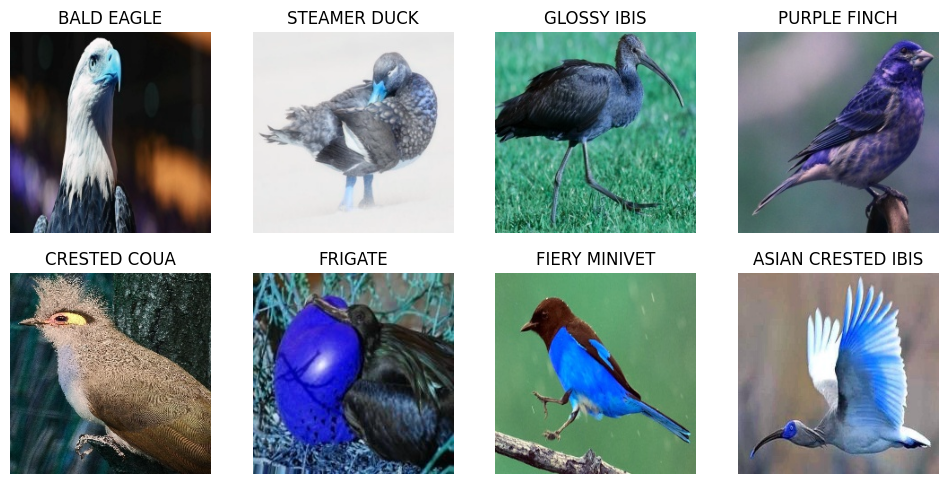

In [23]:
plt.figure(figsize=(12,12))

for i in range(8):
    ax = plt.subplot(4,4,i+1)
    random_index = random.choice(range(len(birds_df)))
    plt.imshow(cv2.imread(birds_df.at[random_index, 'filepaths']))
    plt.title(birds_df.at[random_index, 'labels'])
    plt.axis(False)

<br>
<br>
<p style ='font-size: 24px'>Are the images all of the same size ?</p>
<p style ='font-size: 18px'>The following will check if all the images are of the same size.</p>
<p style ='font-size: 18px'>This will help give an idea if image size adjustments are needed</p>
<br>

In [24]:
image_widths = []
image_heights = []

for i in range(len(birds_df)):
    img = cv2.imread(birds_df.at[i, 'filepaths'])
    image_widths.append(img.shape[0])
    image_heights.append(img.shape[1])
    
print('looping done')

looping done


In [25]:
freq_width = statistics.mode(image_widths)
max_width = max(image_widths)
min_width = min(image_widths)

print(f'Most frequent width is: {freq_width}')
print(f'Max width is: {max_width}')
print(f'Min width is: {min_width}')

Most frequent width is: 224
Max width is: 3421
Min width is: 83


<p style ='font-size: 18px'>Image resizing to 224 will be done when we load our images from image directories for input into models later, for now it is worth knowing that the image files contains some images that are of different sizes and that there will be a need for some adjustments</p>
<br>

<p style ='font-size: 26px'>4. Duplicate images</p>

<p style ='font-size: 18px'>Duplicate images can cause inherent biases and may result in poor generalization</p>
<p style ='font-size: 18px'>To solve it I will use image hashing to uniquely identify an image or images if they result in a same hash</p>
<p style ='font-size: 18px'>The declared function called imageHash is a helper function which takes in an image and a hash size. The functon willl return the hash of an input image</p>

In [26]:
def imageHash(image, hashSize=8):
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(grayImage, (hashSize + 1, hashSize))

    diff = resized[:, 1:] > resized[:, :-1]
    
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

<br>
<p style ='font-size: 24px'>Retreaving an image to be hashed using paths from the csv file as inputs into cv2's imread function</p>
<p style ='font-size: 18px'>The images hashed will be store in a dictionary with hashes as keys and image paths as values.</p>
<p style ='font-size: 18px'>this stored information will help remove any duplicate files if any duplicates are found </p>
<p style ='font-size: 18px'>duplicate_images is a list that contains all image hashes. it will be equal to 1 if there are no duplicates and greater than 1 if there are duplicate files under the same hash.</p>
<br>


In [27]:
file_paths =  birds_df['filepaths'].tolist()
hashes = {}
duplicate_images = []

for imagePath in file_paths:
    image =cv2.imread(imagePath)
    h = imageHash(image)
    p = hashes.get(h, [])
    p.append(imagePath)
    if len(p) > 1:
        duplicate_images.append(h)
    hashes[h] = p

In [28]:
print(len(duplicate_images))

0


<br>
<p style ='font-size: 26px'>5. Data Generator</p>
<p style ='font-size: 18px'>To be able to use our data as inputs to our machine learning model the following will use a data generator to load our data for training, testing and validation into respective variables using image data generator from tensorflow.</p>

In [29]:
data_generator = ImageDataGenerator(rescale=1./255)

train = data_generator.flow_from_directory('train', target_size=(224, 224), batch_size=32, class_mode='sparse')
test = data_generator.flow_from_directory('test', target_size=(224, 224), batch_size=32, class_mode='sparse')
valid = data_generator.flow_from_directory('valid', target_size=(224, 224), batch_size=32, class_mode='sparse')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


<br>
<br>
<p style ='font-size: 26px'>6. Data analysis and Preprocessing Summary</p>

<ul style="font-size: 18px;">
  <li>In summary, there are 89,885 rows in this dataset.</li>
  <li>There are no columns and rows that are null.</li>
  <li>The dataset contains three unique sets, namely:
    <ul>
      <li>Train set containing 84,635 data entries.</li>
      <li>Test set containing 2,625 data entries.</li>
      <li>Valid set containing 2,625 data entries.</li>
    </ul>
  </li>
  <li>Some labels in the training dataset contain more instances than others.</li>
  <li>Found broken file paths and corrected them; no broken paths exist.</li>
  <li>Checked for duplicate images, and no duplicate images were found.</li>
  <li>Data contained images of different sizes, with the majority size being 224.</li>
  <li>Image size differences solved; all images are resized to 224 using the image data generator object.</li>
</ul>


<br>
<br>
<p style ='font-size: 26px'>7. BASELINE MODEL</p>

<p style ='font-size: 22px'>Baselline model using a scikit learn's Dummy classifier</p>

In [30]:
def dummy_classifier(strategy, random_state):
    classifier = DummyClassifier(strategy= strategy, random_state= random_state)
    classifier.fit(train.filenames, train.classes)

    y_pred = classifier.predict(test.filenames)
    accuracy = accuracy_score(test.classes, y_pred)

    print(f'Strategy = {strategy}: Baseline Accuracy Score: {round(accuracy * 100, 2)}%')

In [31]:
dummy_classifier('stratified', 42)
dummy_classifier('uniform', 42)

Strategy = stratified: Baseline Accuracy Score: 0.23%
Strategy = uniform: Baseline Accuracy Score: 0.19%


<br>
<p style ='font-size: 22px'>Baselline model using the statistic module</p>

In [32]:
statistics.mode(birds_df['labels'])
baseline_train = birds_df[birds_df['data set'] == 'train']
y_train = baseline_train['labels']

baseline_test = birds_df[birds_df['data set'] == 'test']
y_test = baseline_test['labels']

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

guess = statistics.mode(y_train)
y_pred = [guess] * len(y_test)

score = accuracy_score(y_test, y_pred)

print(f'accuracy score {round(score * 100, 2)}%')

accuracy score 0.19%


<br>
<p style ='font-size: 22px'>Baselline model using a simple neural network</p>

<p style ='font-size: 18px'>The following is a baseline model using a simple neural network with 3 layers. It uses relu as activation and the output layer usese sofmax.</p>

In [40]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(525, activation = 'softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        3692

<br>
<br>
<p style ='font-size: 18px'>The model will be trained for 3 epochs using train and valid dataset.</p>

In [42]:
model.compile(optimizer = 'rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train, validation_data = valid, epochs=3, batch_size=32)

Epoch 1/3
2645/2645 [==============================] - 364s 137ms/step - loss: 4.9076 - accuracy: 0.1433 - val_loss: 3.4495 - val_accuracy: 0.3215
Epoch 2/3
2645/2645 [==============================] - 365s 138ms/step - loss: 2.8011 - accuracy: 0.4328 - val_loss: 3.4067 - val_accuracy: 0.3398
Epoch 3/3
2645/2645 [==============================] - 367s 139ms/step - loss: 1.9927 - accuracy: 0.5768 - val_loss: 3.5571 - val_accuracy: 0.3150


<br>
<br>
<p style ='font-size: 18px'>We can see how the model perfomed using graphs and to plot these graphs we will use matplotlib</p>

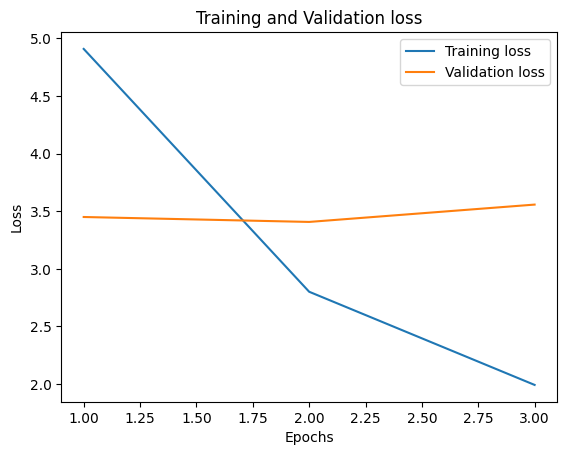

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

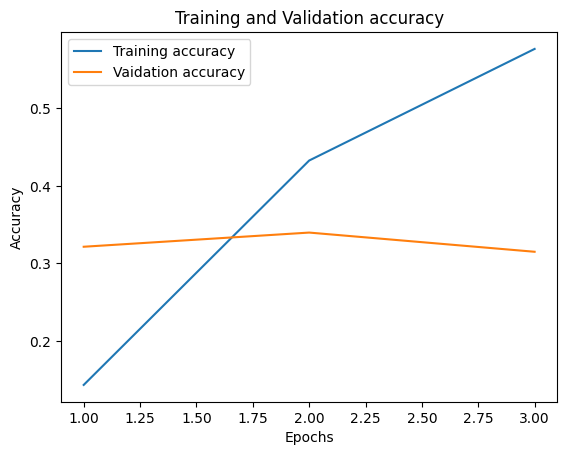

In [44]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'Training accuracy')
plt.plot(epochs, val_acc, label='Vaidation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<br>
<p style ='font-size: 26px'>8. Describing and choosing a baseline Deep Learning Classification Model<p/>


<p style ='font-size: 18px'>Having run 3 baselines using three different approches, the perfomance of the first 2 was very low, with the highest accuracy score from the Dummy Classifier being <b>0.23%. </p>


- <p style ='font-size: 18px'>This highest score was achieved after using the Dummy Classifiers' 'stratified' strategy which takes into account the imbalances in the dataset.</p>
- <p style ='font-size: 18px'>The other 2, are:</p>
<p style ='font-size: 18px'> <b>1.</b> the dummy Classifier using the 'uniform' strategy</p>
<p style ='font-size: 18px'> <b>2.</b> a classifier created using the statistic modules</p>
- <p style ='font-size: 18px'>These 2 had the same accuracy score of  <b>0.19%</b>, this is because they both use the same approach of calculating the accuracy score based on class frequency or mode, taking into consideration the class with the most appearances.</p>


<p style ='font-size: 18px'>Lastly the 3rd baseline is a simple neural network with a validation accuracy score of <b>31%</b>. From the graphs it can be seen that there is still more potential for the model to perform better. 3 epochs seemed not enough, signifying that training on more epochs has a capability of improving the model's perfomance. </p>
<br>

<p style ='font-size: 18px'> <b>The chosen baseline model</b> is the simple neural network with an accuracy score of <b>58%</b> </p>

<br>
<br>
<p style ='font-size: 26px'> 9. Beating the baseline</p>